In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [43]:
df = pd.read_csv("Loan_Default.csv")

print("Shape:", df.shape)
df.head()


Shape: (148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [44]:
df.drop(columns=["ID"], inplace=True)


In [45]:
df.isnull().sum().sort_values(ascending=False)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
property_value               15098
LTV                          15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
year                             0
business_or_commercial           0
open_credit                      0
lump_sum_payment                 0
interest_only                    0
loan_amount                      0
Gender                           0
loan_type                        0
Credit_Worthiness                0
occupancy_type                   0
construction_type                0
Credit_Score                     0
credit_type                      0
total_units                      0
Secured_by          

In [46]:
df[['loan_amount', 'property_value', 'LTV']].head()


,loan_amount,property_value,LTV
0,116500,118000.0,98.728814
1,206500,NaN,NaN
2,406500,508000.0,80.019685
3,456500,658000.0,69.376900
4,696500,758000.0,91.886544


In [47]:
((df['loan_amount'] / df['property_value']) * 100).head()


0    98.728814
1          NaN
2    80.019685
3    69.376900
4    91.886544
dtype: float64

In [48]:
df['property_value'] = df['property_value'].fillna(df['property_value'].median())


In [49]:
df['LTV'] = (df['loan_amount'] / df['property_value']) * 100


In [50]:
num_cols = [
    'Upfront_charges',
    'Interest_rate_spread',
    'rate_of_interest',
    'dtir1',
    'income',
    'term'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [51]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(col, df[col].unique())  # inspect before filling


loan_limit ['cf' nan 'ncf']
Gender ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv ['nopre' 'pre' nan]
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
business_or_commercial ['nob/c' 'b/c']
Neg_ammortization ['not_neg' 'neg_amm' nan]
interest_only ['not_int' 'int_only']
lump_sum_payment ['not_lpsm' 'lpsm']
construction_type ['sb' 'mh']
occupancy_type ['pr' 'sr' 'ir']
Secured_by ['home' 'land']
total_units ['1U' '2U' '3U' '4U']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ['CIB' 'EXP']
age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application ['to_inst' 'not_inst' nan]
Region ['south' 'North' 'central' 'North-East']
Security_Type ['direct' 'Indriect']


In [52]:
df['Security_Type'] = df['Security_Type'].replace({'Indriect': 'Indirect'})


In [53]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- loan_limit ---
loan_limit
cf     135348
ncf      9978
NaN      3344
Name: count, dtype: int64

--- Gender ---
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

--- approv_in_adv ---
approv_in_adv
nopre    124621
pre       23141
NaN         908
Name: count, dtype: int64

--- loan_type ---
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

--- loan_purpose ---
loan_purpose
p3     55934
p4     54799
p1     34529
p2      3274
NaN      134
Name: count, dtype: int64

--- Credit_Worthiness ---
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

--- open_credit ---
open_credit
nopc    148114
opc        556
Name: count, dtype: int64

--- business_or_commercial ---
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

--- Neg_ammortization ---
Neg_ammortization
not_neg    133420
neg_amm     15129
NaN           121
Name: 

In [54]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [55]:
df.isnull().sum()

year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

In [56]:
df['Status'].value_counts()
df['Status'].value_counts(normalize=True)


Status
0    0.753555
1    0.246445
Name: proportion, dtype: float64

In [57]:
df.describe()


,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,2019.0,3.311177e+05,4.031879,0.429024,3057.397919,335.143438,4.897800e+05,6883.647811,699.789103,73.373604,0.246445,37.938508
std,0.0,1.839093e+05,0.488348,0.445907,2797.972965,58.402488,3.420221e+05,6300.067060,115.875857,40.936955,0.430942,9.663417
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,59.615385,0.000000,33.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.082237,0.000000,39.000000
75%,2019.0,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,86.952555,0.000000,44.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


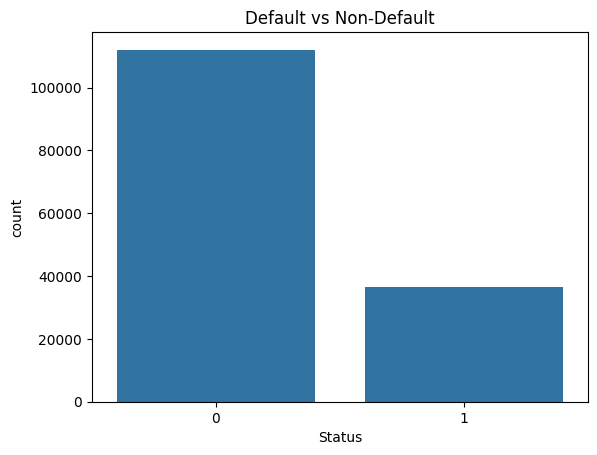

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Status', data=df)
plt.title("Default vs Non-Default")
plt.show()


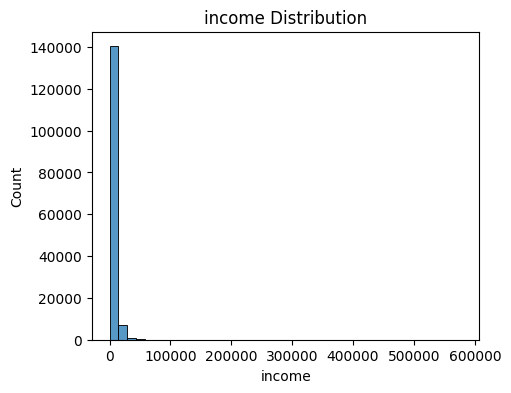

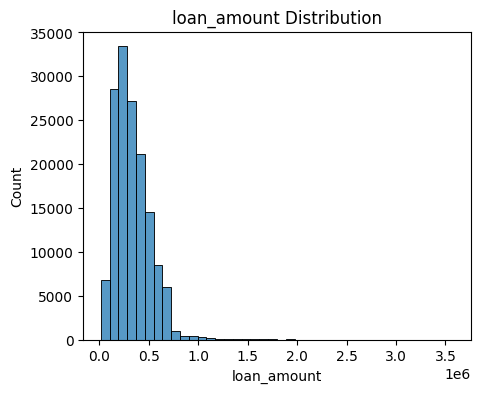

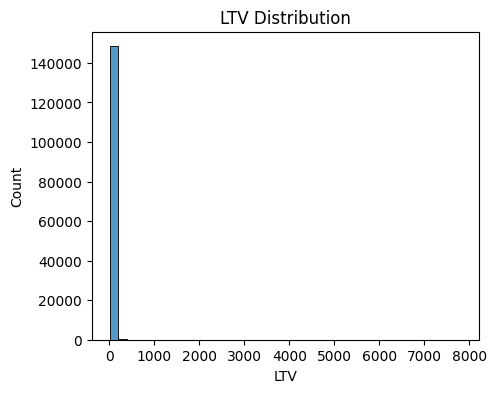

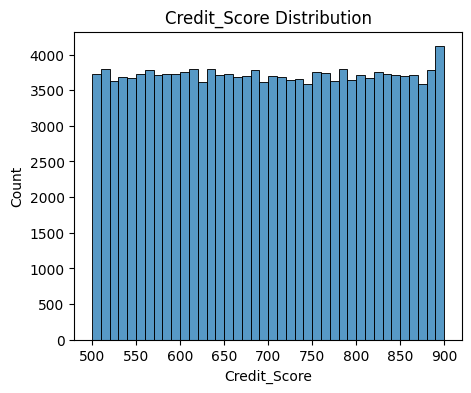

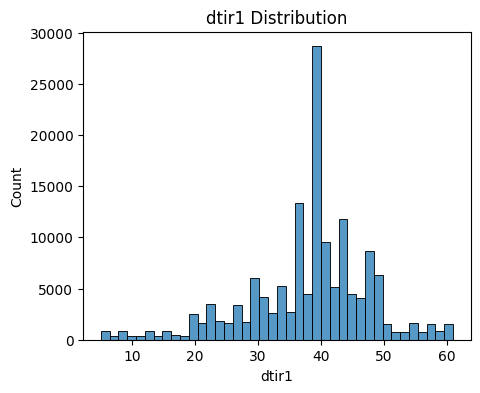

In [59]:
num_cols = ['income','loan_amount','LTV','Credit_Score','dtir1']

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], bins=40)
    plt.title(f"{col} Distribution")
    plt.show()


In [60]:
df[num_cols].skew()

income           17.844998
loan_amount       1.666998
LTV             101.258449
Credit_Score      0.004767
dtir1            -0.663857
dtype: float64

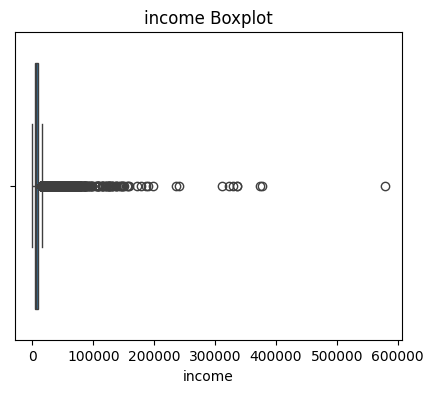

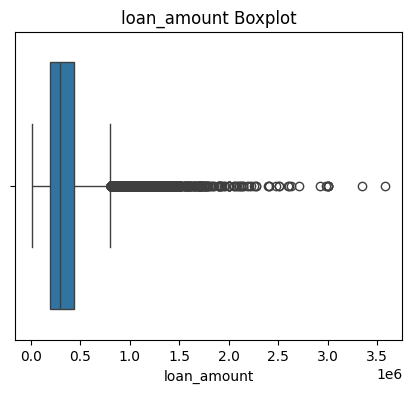

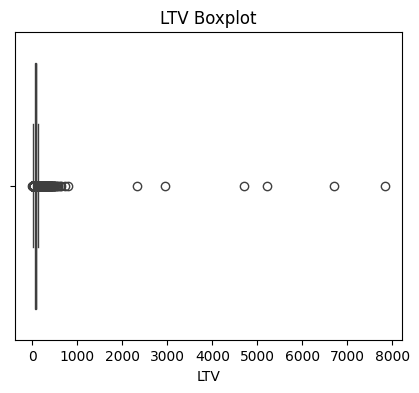

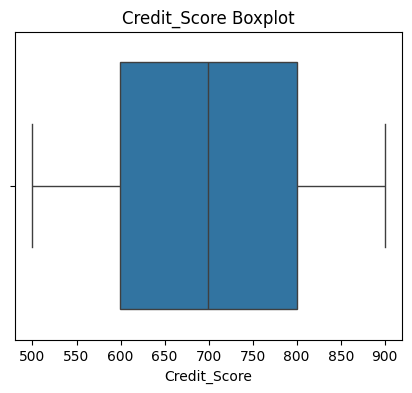

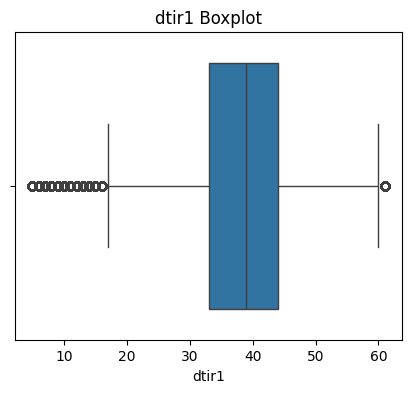

In [61]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()


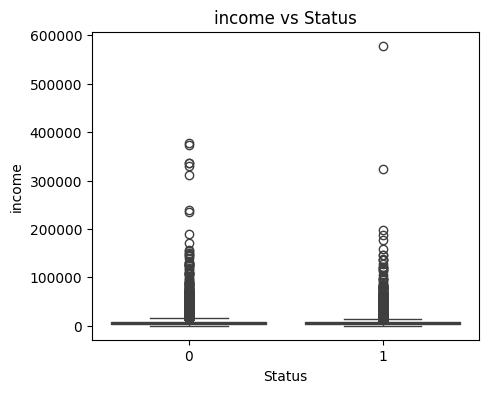

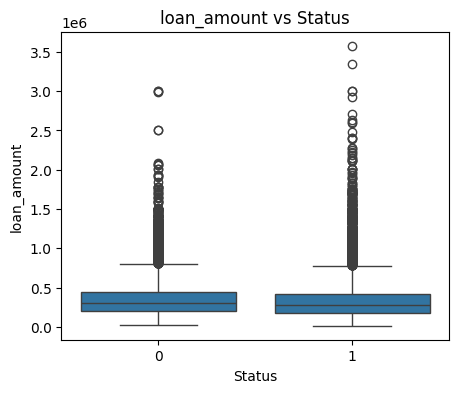

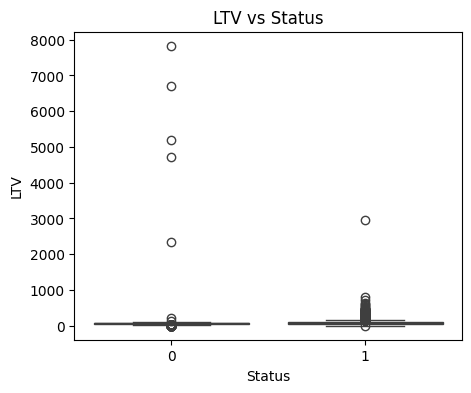

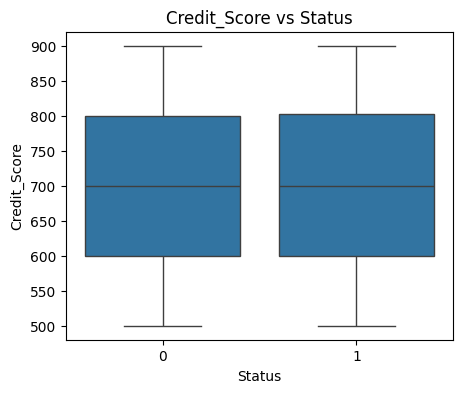

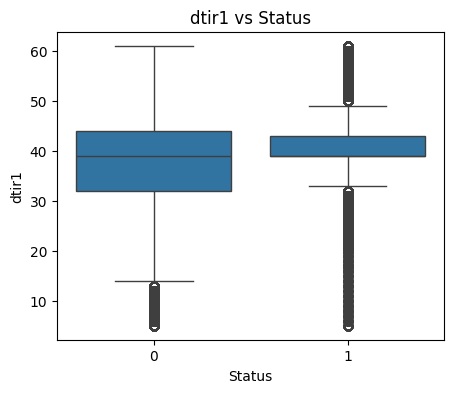

In [62]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='Status', y=col, data=df)
    plt.title(f"{col} vs Status")
    plt.show()


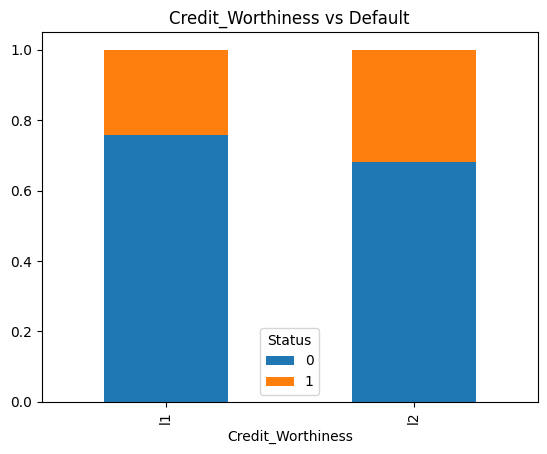

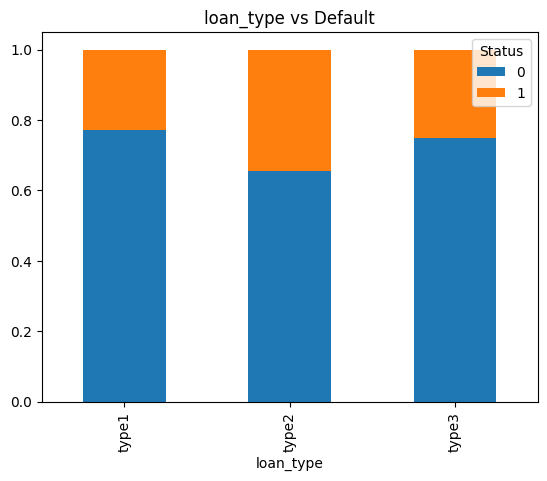

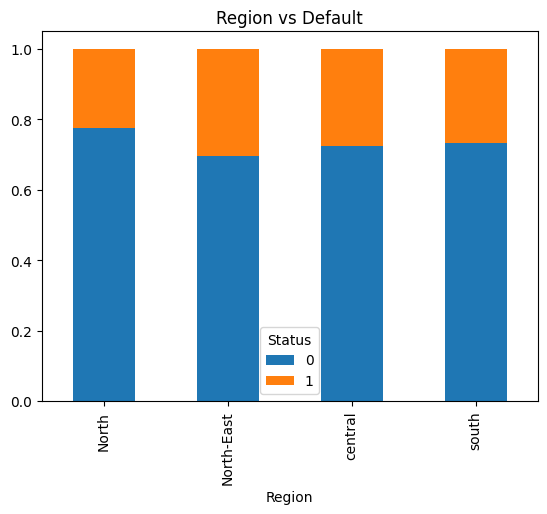

In [63]:
important_cat = ['Credit_Worthiness','loan_type','Region']

for col in important_cat:
    pd.crosstab(df[col], df['Status'], normalize='index')\
      .plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Default")
    plt.show()


In [64]:
df.drop(columns=['year'], inplace=True)


In [65]:
df['LTV'] = df['LTV'].clip(upper=200)


In [66]:
df[df['rate_of_interest'] == 0].shape


(1, 32)

In [67]:
df[df['rate_of_interest'] == 0][['loan_amount','Status']].head()


,loan_amount,Status
36272,406500,0


In [68]:


#  Remove unrealistic 0% interest rate row
df = df[df['rate_of_interest'] != 0]

# Drop constant column (no variance)
if 'year' in df.columns:
    df.drop(columns=['year'], inplace=True)

# Cap extreme LTV values (to control unrealistic outliers)
df['LTV'] = df['LTV'].clip(upper=200)

# Log transform heavily right-skewed features
# (Reduces effect of extreme large values)
df['loan_amount'] = np.log1p(df['loan_amount'])
df['income'] = np.log1p(df['income'])
df['property_value'] = np.log1p(df['property_value'])

# Leave these as-is (based on EDA findings):
# - Credit_Score (clean distribution)
# - rate_of_interest (only one zero removed)
# - dtir1 (normal range, no extreme skew)


In [69]:
df.drop(columns=['construction_type','Secured_by','Security_Type'], inplace=True)


In [70]:
binary_map = {
    'loan_limit': {'cf':0,'ncf':1},
    'approv_in_adv': {'nopre':0,'pre':1},
    'open_credit': {'nopc':0,'opc':1},
    'business_or_commercial': {'nob/c':0,'b/c':1},
    'Neg_ammortization': {'not_neg':0,'neg_amm':1},
    'interest_only': {'not_int':0,'int_only':1},
    'lump_sum_payment': {'not_lpsm':0,'lpsm':1},
    'Credit_Worthiness': {'l1':1,'l2':0}
}

for col, mapping in binary_map.items():
    df[col] = df[col].map(mapping)


In [71]:
age_map = {
    '<25':1,'25-34':2,'35-44':3,
    '45-54':4,'55-64':5,'65-74':6,'>74':7
}
df['age'] = df['age'].map(age_map)


In [72]:
df = pd.get_dummies(df, drop_first=True)


In [73]:
df.info()
df.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 148669 entries, 0 to 148669
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   loan_limit                         148669 non-null  int64  
 1   approv_in_adv                      148669 non-null  int64  
 2   Credit_Worthiness                  148669 non-null  int64  
 3   open_credit                        148669 non-null  int64  
 4   business_or_commercial             148669 non-null  int64  
 5   loan_amount                        148669 non-null  float64
 6   rate_of_interest                   148669 non-null  float64
 7   Interest_rate_spread               148669 non-null  float64
 8   Upfront_charges                    148669 non-null  float64
 9   term                               148669 non-null  float64
 10  Neg_ammortization                  148669 non-null  int64  
 11  interest_only                      148669 no

np.int64(0)

In [74]:
df.to_csv("loan_default_final_cleaned.csv", index=False)


In [75]:
print("Total Records:", len(df))
print("Default Rate:", round(df['Status'].mean()*100,2), "%")
print("Average Credit Score:", round(df['Credit_Score'].mean(),2))
print("Average LTV:", round(df['LTV'].mean(),2))
print("Average DTI:", round(df['dtir1'].mean(),2))


Total Records: 148669
Default Rate: 24.64 %
Average Credit Score: 699.79
Average LTV: 73.05
Average DTI: 37.94


In [86]:
df['loan_to_income'] = df['loan_amount'] / df['income']
df['high_LTV_flag'] = (df['LTV'] > 90).astype(int)
df['low_credit_flag'] = (df['Credit_Score'] < 650).astype(int)
df['high_dti_flag'] = (df['dtir1'] > 45).astype(int)
df['risk_interaction'] = df['low_credit_flag'] * df['high_LTV_flag']


In [87]:
df.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,loan_per_year,loan_income_ratio,high_LTV_flag,very_high_LTV_flag,low_credit_flag,very_low_credit_flag,high_dti_flag,high_interest_flag,credit_LTV_interaction,risk_interaction
0,0,0,1,0,0,11.665655,3.99,0.3904,2596.45,360.0,...,0.388855,0.625319,1,0,0,0,0,0,74836.440678,0
1,0,0,1,0,1,12.238061,3.99,0.3904,2596.45,360.0,...,0.407935,0.575003,0,0,1,1,0,0,27269.856459,0
2,0,1,1,0,0,12.915342,4.56,0.2000,595.00,360.0,...,0.430511,0.564171,0,0,0,0,1,0,66736.417323,0
3,0,0,1,0,0,13.031346,4.25,0.6810,2596.45,360.0,...,0.434378,0.555548,0,0,1,1,0,0,40724.240122,0
4,0,1,1,0,0,13.453825,4.00,0.3042,0.00,360.0,...,0.448461,0.581567,1,0,1,0,0,0,55315.699208,1


In [88]:
df.select_dtypes(include='object').columns


Index([], dtype='object')

In [89]:
df.isnull().sum().sum()


np.int64(0)

In [90]:
df['LTV'].max()


np.float64(200.0)

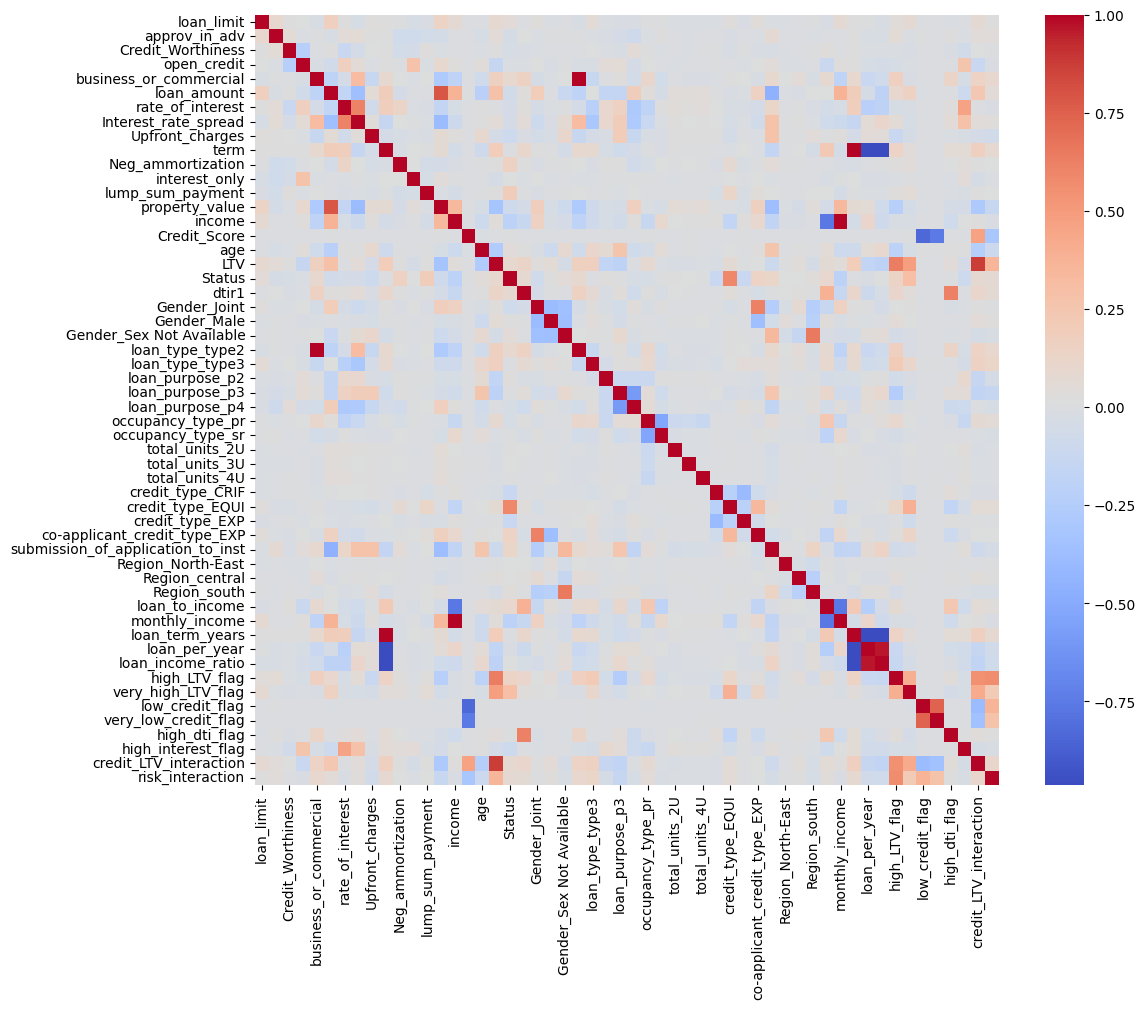

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [92]:
df.drop(columns=[
    'monthly_income',
    'loan_term_years',
    'loan_per_year',
    'loan_income_ratio'
], inplace=True)


In [93]:
df.drop(columns=['credit_LTV_interaction'], inplace=True)


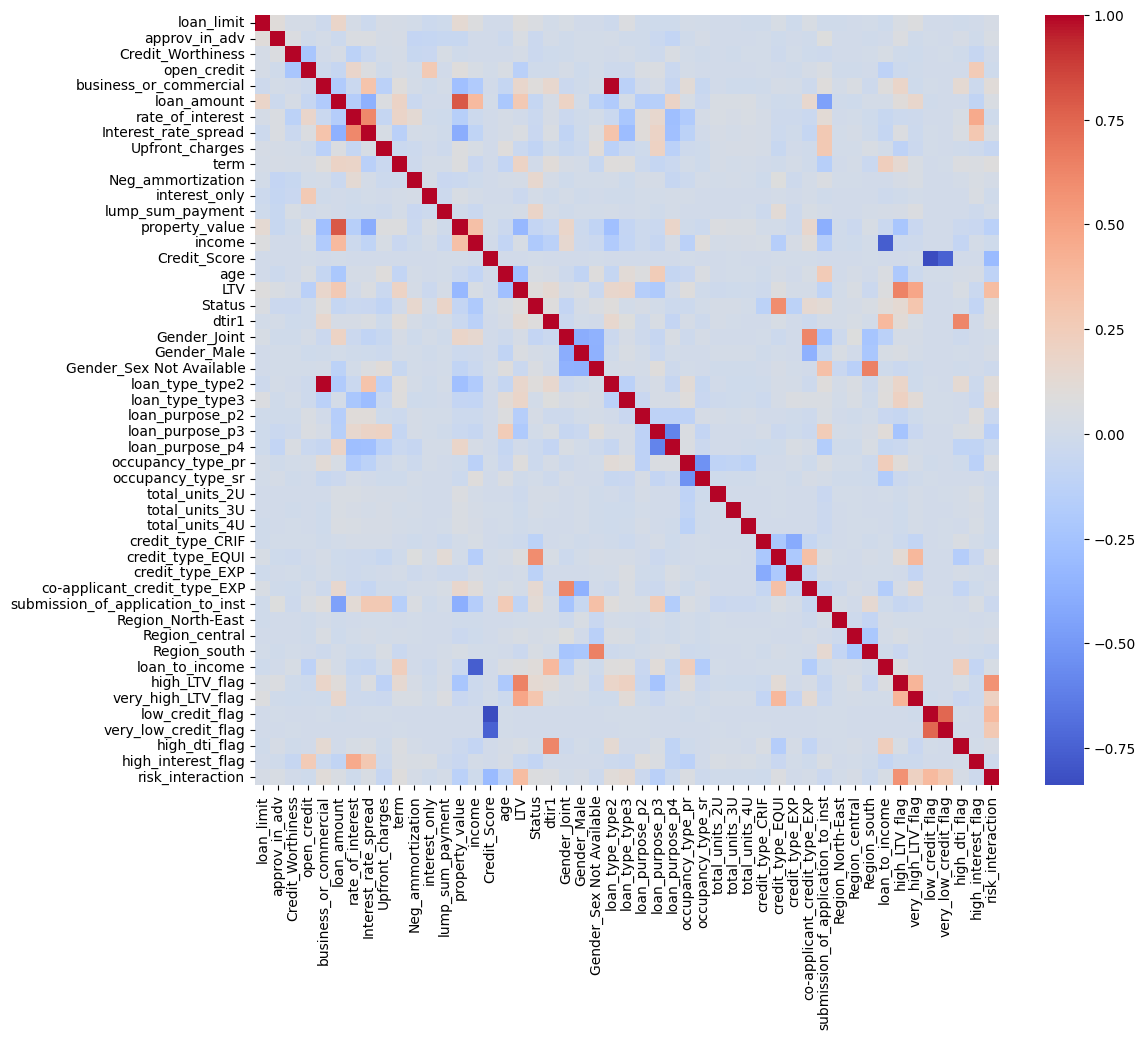

In [94]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


In [95]:
df.corr()['Status'].sort_values(ascending=False)


Status                               1.000000
credit_type_EQUI                     0.592167
very_high_LTV_flag                   0.301116
lump_sum_payment                     0.187752
Neg_ammortization                    0.155834
co-applicant_credit_type_EXP         0.144236
high_LTV_flag                        0.135475
submission_of_application_to_inst    0.122413
loan_to_income                       0.100104
LTV                                  0.094329
loan_type_type2                      0.092548
business_or_commercial               0.092548
dtir1                                0.082425
risk_interaction                     0.073277
Gender_Sex Not Available             0.053343
loan_limit                           0.053331
age                                  0.044279
Region_south                         0.040056
loan_purpose_p2                      0.029369
total_units_2U                       0.022977
Gender_Male                          0.022651
Region_central                    

In [96]:
pd.crosstab(df['credit_type_EQUI'], df['Status'], normalize='index')


Status,0,1
credit_type_EQUI,,
False,0.839980,0.160020
True,0.000065,0.999935


In [98]:
df.drop(columns=['credit_type_EQUI'], inplace=True)


In [99]:
df.corr()['Status'].sort_values(ascending=False)


Status                               1.000000
very_high_LTV_flag                   0.301116
lump_sum_payment                     0.187752
Neg_ammortization                    0.155834
co-applicant_credit_type_EXP         0.144236
high_LTV_flag                        0.135475
submission_of_application_to_inst    0.122413
loan_to_income                       0.100104
LTV                                  0.094329
loan_type_type2                      0.092548
business_or_commercial               0.092548
dtir1                                0.082425
risk_interaction                     0.073277
Gender_Sex Not Available             0.053343
loan_limit                           0.053331
age                                  0.044279
Region_south                         0.040056
loan_purpose_p2                      0.029369
total_units_2U                       0.022977
Gender_Male                          0.022651
Region_central                       0.016737
total_units_3U                    

In [101]:
print("Default Rate: {:.2f}%".format(df['Status'].mean()*100))
print("Average Income (log scale):", round(df['income'].mean(),2))
print("Average Credit Score:", round(df['Credit_Score'].mean(),2))
print("Average LTV:", round(df['LTV'].mean(),2))
print("High Risk Loans (%): {:.2f}%".format(df['high_LTV_flag'].mean()*100))


Default Rate: 24.64%
Average Income (log scale): 8.58
Average Credit Score: 699.79
Average LTV: 73.05
High Risk Loans (%): 20.28%


In [100]:
print("Total Records:", df.shape[0])
print("Total Features:", df.shape[1])
print("Missing Values:", df.isnull().sum().sum())

# Save cleaned dataset
file_name = "loan_default_final_dataset.csv"
df.to_csv(file_name, index=False)

print("\nDataset saved successfully as:", file_name)

Total Records: 148669
Total Features: 48
Missing Values: 0

Dataset saved successfully as: loan_default_final_dataset.csv
